# 1 文档

首先得确定的是，任何非官方的教程都存在错误或者是时效性差的缺点，为了获得**最全面的最新的最正确**的使用方法，我们只能选择官方文档。

这就是matplotlib的官网地址：https://matplotlib.org/index.html

很遗憾没有中文网站，不过接下来python编程中大部分的包都没有中文，慢慢地就习惯了。

# 2 认识图像成份

首先来认识一下matplotlib是怎么看待一张图的。

![like](data\\anatomy.png)

## 2.1 Figure

一个figure有很多axes，如果要显示出来，则至少有一个。

下面画两张图试试看

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

Text(0.5, 0.98, 'No axes on this figure')

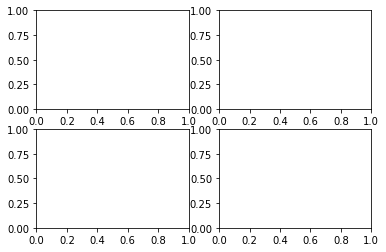

In [2]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

## 2.2 Axes

Figure是画布，Axes是画图，Axis是轴，一张figure里可以有很多axes，一张axes里可以有两个或者三个axis，取决于二维或者三维图像。

每个Axes都可以有一个title，可以被set_title()来设置，在每一轴上都可以用label来解释其含义。


## 2.3 Axis

Axis上有很多刻度，表示了图像的尺度，刻度旁边也有label来表示其含义

## 2.4 Artist

在figure上的几乎所有东西，都是一个artist，差不多就是matlotlib的诸多对象，当figure被渲染出来的时候，所有的artists都被画到了画布上。

# 3 使用pyplot

matplotlib.pyplot是一个有命令风格的函数集合，它看起来和MATLAB很相似。每一个pyplot函数都使一副图像做出些许改变，例如创建一幅图，在图中创建一个绘图区域，在绘图区域中添加一条线等等。

在matplotlib.pyplot中，各种状态在不停的函数调用中是被保留了的，以便于可以随时跟踪像当前图像和绘图区域，并且绘图函数作用于当前axes（matplotlib中的专有名词，图形中组成部分，不是数学中的坐标系。） 

用pyplot画图非常方便：

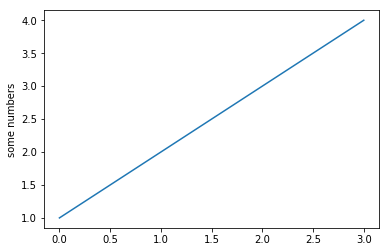

In [3]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

如果你传递给plot()一个list，matplotlib假设他是y的数据，并自动生成x数据，生成的是数量和y相同的整数，但是是从0开始的，所以你看到了x轴是0到3。

plot函数非常万能，可以接受任意多的参数。比如两个维度的图像：

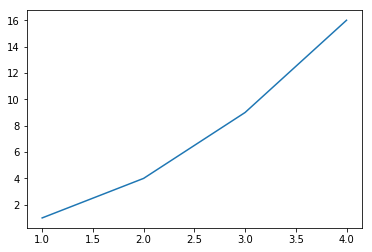

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

## 3.1 图像的格式

对于x，y的数对，第三个参数字符串可以规定图像的格式，比如颜色和线条类型，该字符串格式中的字母和符号来自于MATLAB，它是颜色字符串和线的类型字符串的组合。默认情况下，该字符串参数是‘b-’，表示蓝色的实线。 

我们用红点来画上面的图像看看

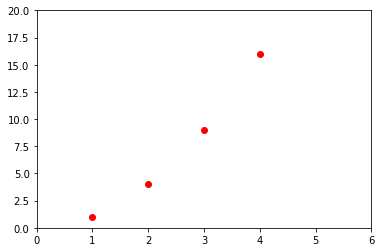

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

查阅文档中的plot()，以获得plot关于线条类型的信息和格式化字符串的方法。

axis()方法用一个list指定了x y的呈现方式，\[xmin, xmax, ymin, ymax\]。

不止是list，matplotlib接受非常多的类型来画图，比如numpy的array。事实上，所有的序列都是在matplotlib内部转化成了array再画图的。

下面的图展示了用array在同一个figure上画各种格式的线条的方法。

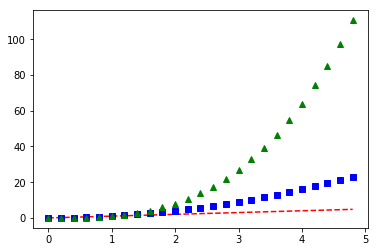

In [6]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## 3.2 使用关键字

有一些类型可以让你通过控制关键字来控制数据，比如numpy.recarray or pandas.DataFrame。

Matplotlib允许使用这些关键字来画图，方法如下：

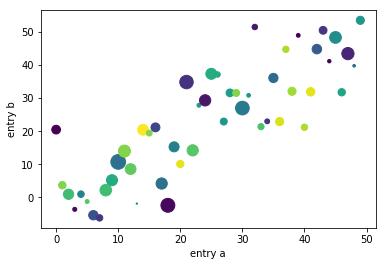

In [7]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## 3.3 用变量画图

这就很直白了，见例子

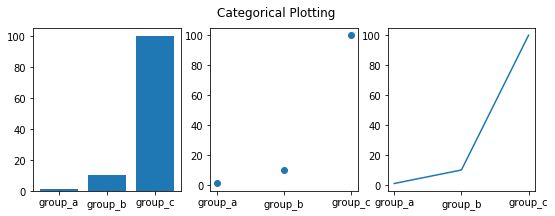

In [8]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## 3.4 控制线条属性

line有很多属性可以设置， linewidth, dash style, antialiased，详细的请看[文档](https://matplotlib.org/3.0.3/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)。

下面介绍几种设置的方法。

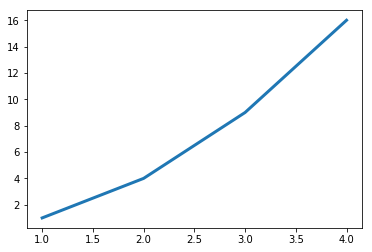

In [9]:
# Use keyword args:
x=[1, 2, 3, 4]
y=[1, 4, 9, 16]
plt.plot(x, y, linewidth=3.0)

使用line2D实例的方法进行调节。plot方法会返回一个line2D的实例列表，无论返回多少，我们操作解包后的第一个实例。

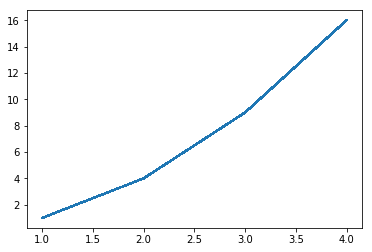

In [10]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialising

使用setp()命令。 下面的例子使用的是MATLAB风格的命令去设置一个线的列表的多个属性。setp()可以作用于一个列表对象或者是一个单一的对象。你可以使用python风格的关键字参数或者是MATLAB风格的string/value对为参数：

[None, None, None, None]

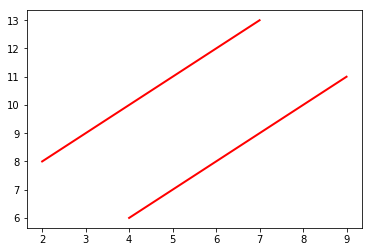

In [11]:
x1=list(range(4,10))
x2=list(range(2,8))
y1=list(range(6,12))
y2=list(range(8,14))
lines = plt.plot(x1, y1, x2, y2)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)

[None, None, None, None]

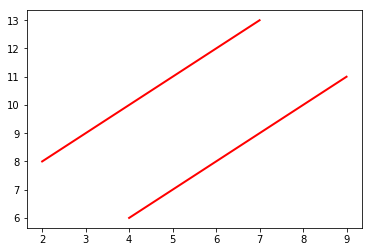

In [12]:
# or MATLAB style string value pairs
lines = plt.plot(x1, y1, x2, y2)
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

## 3.5 多图

pyplot有当前figure和当前axes的概念，所有的画图命令都针对的是当前的axes，gca()方法可以返回当前的axes对象，gcf()方法可以返回当前的figure对象。下面将创造两个子画布。

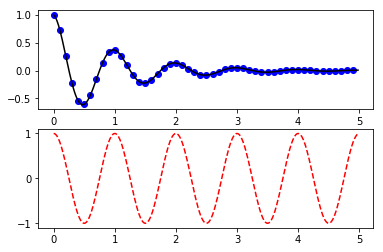

In [13]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

figure()方法是可选的，因为figure会被默认创造，就像subplot(111)是被默认创造的一样，subplot()中的参数分别指定了numrows、numcols、plot_number，其中plot_number的取值范围为1到numrows\*numcols，分别表示的是将绘图区域划分为numrows行和numcols列个子绘图区域，fignum为当前子图的编号。编号是从1开始，一行一行由左向右编号的。

其实subplot中的参数【111】本应写作【1,1,1】，但是如果这三个参数都小于10(其实就是第三个参数小于10)就可以省略逗号。你可以创建任意数量的子图(subplots)和坐标系(axes)。如果你想手动放置一个axes，也就是它不再是一个矩形方格，你就可以使用命令axes()，它可以让坐标系位于任何位置，axes([left,bottom,width,height])，其中所有的值都是0到1(axes([0.3,0.4,0.2,0.3])表示的是该坐标系位于figure的(0.3,0.4)处，其宽度和长度分别为figure横坐标和纵坐标总长的0.2和0.3)。其实subplot和axes的区别就在于axes大小和位置更加随意。 

你可以创建多个figure，通过调用figure()，其参数为figure的编号。当然每个figure可以包含多个subplot或者是多个axes。例子：

d:\Users\i9233\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Easy as 1, 2, 3')

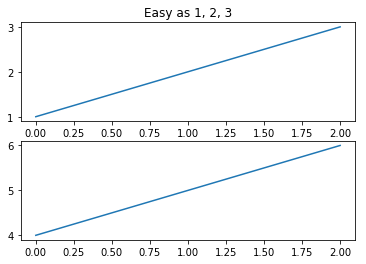

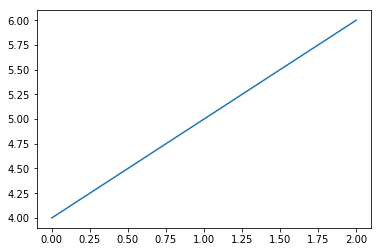

In [14]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

你可以用clf()和cla()分别清空当前的figure和axes。如果你发现控制图像非常令人沮丧，因为他们都在屏幕背后，请别丧气，这只是面向对象的一种表现，后面有其他的方法可以使用。

如果你创造了很多画图，你还需要注意一件事情，分配给figure的内存在调用close()之前都没有完全地释放，如果只是删掉对figure的引用，或者是通过关闭window进程管理器关闭该figure，这都是不完全删除figure的，因为pyplot在内部维持了一个引用，直到close()被调用。

## 3.6 控制文字

text()方法可以添加文字到任意的地方，xlabel(), ylabel() 和 title()可以添加文字到指出的地方。

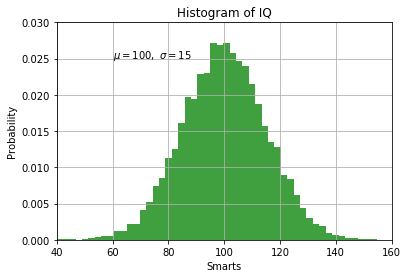

In [15]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

所有的text()都会返回一个text实例，就像控制线条属性一样，你也可以传递参数或者是用其他方法来控制文字

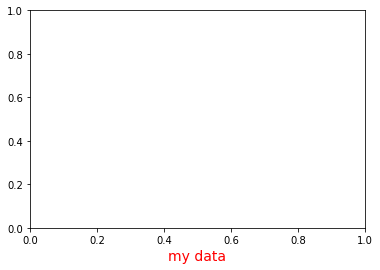

In [16]:
t = plt.xlabel('my data', fontsize=14, color='red')

## 3.7 在文字中使用公式

matplotlib接受Tex公式，如果你不熟悉Tex，请自己去了解。我们可以在text中这样加入公式
```
plt.title(r'$\sigma_i=15$') 
```

r是非常重要的，表明了后面这句话是字符串，并不需要转义，即跳过对\\的解析。matplotlib内置有TeX表达式解释器和排版引擎，和自带的数学字体。因此你可以不用安装TeX就能使用数学表达式，如果你安装了LaTeX和dvipng，你也可以使用LaTex排版你的文字并且直接输出到figures或者是保存。

## 3.8 注释

text的常用功能就是去注释图像的特点，annotate() 方法可以更容易地提供帮助。在一句注释中，有两个要考虑的地方，被注释的目标的位置，注释文本的位置，都是用一个元组来设置的。

更多的注释方法请看文档。

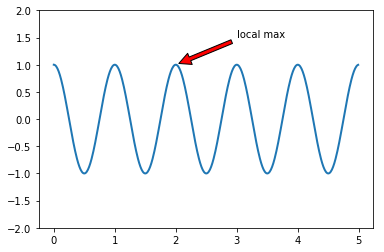

In [18]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

## 3.9 非线性的尺度

如果数据跨度非常大，超越了几个量级，我们就使用非线性的尺度。非常简单。

```plt.xscale('log')```

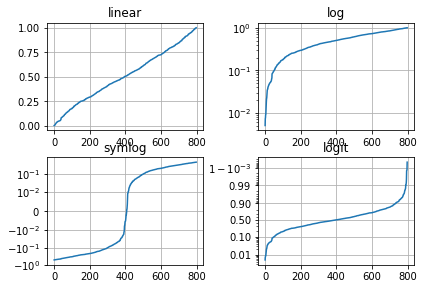

In [19]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()